In [1]:
#import matplotlib.pyplot as plt
#import pandas as pd
#import numpy as np
#import seaborn as sns
#import scipy
#import scipy.stats as sps
#import statsmodels.formula.api as smf
#import statsmodels.api as sm

import statsmodels.formula.api as smf
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as sps
from matplotlib.ticker import AutoMinorLocator
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling

In [2]:
dfcrime = pd.read_csv('2017crimedataedited.csv')

In [3]:
dfincome = pd.read_csv('GrossDisposableIncomeEditedForAssessment.csv')

In [4]:
dfdeaths = pd.read_csv('drugdeathslocalauthority20162018.csv')

In [5]:
dfdeathsclean = dfdeaths.dropna()

In [6]:
dfdeathsclean.dtypes

Area Codes          object
Area Names          object
DeathRate          float64
DeathRateforLog    float64
dtype: object

In [7]:
dfdeathsclean.dtypes

Area Codes          object
Area Names          object
DeathRate          float64
DeathRateforLog    float64
dtype: object

In [8]:
dfcrimeclean = dfcrime.dropna()

In [9]:
dfcrimeclean.dtypes

Local Authority code                                   object
Local Authority name                                   object
Robbery                                               float64
Theft offences                                        float64
Burglary                                              float64
Non-domestic burglary                                 float64
Vehicle offences                                      float64
Theft            from           the         person    float64
Bicycle                theft                          float64
Shoplifting                                           float64
All other theft offences                              float64
Crime Summed                                          float64
dtype: object

In [10]:
dfincome = dfincome.rename({'2016': 'income2016'}, axis=1)
dfincome.head()

,LAU1 code,LA name,income2016
0,E06000047,County Durham,15221
1,E06000005,Darlington,15487
2,E06000001,Hartlepool,15071
3,E06000002,Middlesbrough,14968
4,E06000057,Northumberland,18016


In [11]:
dfroughsleepers = pd.read_csv('roughsleeperseditedforassignment.csv')

In [12]:
dfroughsleepers.dtypes

New ONS Code                                      object
Local Authority                                   object
2017 Rough Sleeping Rate per 1,000 households    float64
2017rateforlog                                   float64
dtype: object

In [13]:
dfopiates = pd.read_csv('UpdatedOpiateNumbers.csv')

In [14]:
dfopiates.dtypes

Local authority          object
Opiates                 float64
Lower bound  95% CI     float64
Upper bound   95% CI    float64
dtype: object

In [15]:
dfcrimeclean = dfcrime.dropna()

In [16]:
dfroughsleepersclean = dfroughsleepers.dropna()

In [17]:
dfopiatesclean = dfopiates.dropna()

In [18]:
dfroughsleepersclean.head()

,New ONS Code,Local Authority,"2017 Rough Sleeping Rate per 1,000 households",2017rateforlog
0,E07000223,Adur,0.0700,1.0700
1,E07000026,Allerdale,0.0200,1.0200
2,E07000032,Amber Valley,0.0700,1.0700
3,E07000224,Arun,0.2400,1.2400
4,E07000170,Ashfield,0.0900,1.0900


In [19]:
dfincomeclean = dfincome.dropna()

In [20]:
dfincomeclean.head()

,LAU1 code,LA name,income2016
0,E06000047,County Durham,15221
1,E06000005,Darlington,15487
2,E06000001,Hartlepool,15071
3,E06000002,Middlesbrough,14968
4,E06000057,Northumberland,18016


In [21]:
dfmergedinner1 = pd.merge(left=dfopiatesclean, right=dfcrimeclean, left_on='Local authority', right_on='Local Authority name' )

In [22]:
dfdeathsclean.head()

,Area Codes,Area Names,DeathRate,DeathRateforLog
0,E07000223,Adur,14.2000,15.2000
1,E07000026,Allerdale,14.6000,15.6000
2,E07000032,Amber Valley,10.1000,11.1000
3,E07000224,Arun,9.6000,10.6000
4,E07000170,Ashfield,13.9000,14.9000


In [23]:
dfmergedinner2 = pd.merge(left=dfmergedinner1, right=dfincomeclean, left_on='Local authority', right_on='LA name')

In [24]:
dfmergedinner3 = pd.merge(left=dfmergedinner2, right=dfdeathsclean, left_on='Local authority', right_on='Area Names')

In [25]:
dfmergedfinal = pd.merge(left=dfmergedinner3, right=dfroughsleepersclean, left_on='Local authority', right_on='Local Authority')

In [26]:
dfmergedfinal['2017 Rough Sleeping Rate per 1,000 households'].describe()

count                                   102.0000
mean                                      0.2512
std                                       0.3037
min                                       0.0000
25%                                       0.0725
50%                                       0.1450
75%                                       0.3300
max                                       1.8900
Name: 2017 Rough Sleeping Rate per 1,000 households, dtype: float64

In [27]:
dfmergedfinal['2017 Rough Sleeping Rate per 1,000 households'].median()

0.14500000000000002

In [28]:
dfmergedfinal['DeathRate'].describe()

count                                   102.0000
mean                                     12.6775
std                                       6.8906
min                                       3.0000
25%                                       7.8000
50%                                      10.8500
75%                                      16.9000
max                                      41.7000
Name: DeathRate, dtype: float64

In [29]:
dfmergedfinal['DeathRate'].median()

10.850000000000001

In [30]:
dfmergedfinal['Opiates'].describe()

count                                   102.0000
mean                                      8.3620
std                                       3.4485
min                                       2.9900
25%                                       5.9975
50%                                       7.8950
75%                                      10.4000
max                                      21.9500
Name: Opiates, dtype: float64

In [31]:
dfmergedfinal['Opiates'].median()

7.895

In [32]:
dfmergedfinal['income2016'].describe()

count                                   102.0000
mean                                 20,026.4706
std                                   7,542.2712
min                                  12,232.0000
25%                                  15,229.5000
50%                                  18,248.5000
75%                                  21,948.0000
max                                  62,600.0000
Name: income2016, dtype: float64

In [33]:
dfmergedfinal['income2016'].median()

18248.5

In [34]:
dfmergedfinal['Opiates'].median()

7.895

In [35]:
dfmergedfinal['DeathRate'].describe()

count                                   102.0000
mean                                     12.6775
std                                       6.8906
min                                       3.0000
25%                                       7.8000
50%                                      10.8500
75%                                      16.9000
max                                      41.7000
Name: DeathRate, dtype: float64

In [36]:
dfmergedfinal['Opiates_logged'] = np.log(dfmergedfinal['Opiates'])

In [37]:
dfmergedfinal['Crime Summed'].describe()

count                                   102.0000
mean                                     78.1307
std                                      30.7464
min                                      35.1023
25%                                      58.6407
50%                                      75.3036
75%                                      88.0076
max                                     273.6949
Name: Crime Summed, dtype: float64

In [38]:
dfmergedfinal['Crime Summed'].median()

75.3035859

In [39]:
dfmergedfinal['CrimeSummed_logged'] = np.log(dfmergedfinal['Crime Summed'])

In [40]:
dfmergedfinal.head()

,Local authority,Opiates,Lower bound 95% CI,Upper bound 95% CI,Local Authority code,Local Authority name,Robbery,Theft offences,Burglary,Non-domestic burglary,...,Area Codes,Area Names,DeathRate,DeathRateforLog,New ONS Code,Local Authority,"2017 Rough Sleeping Rate per 1,000 households",2017rateforlog,Opiates_logged,CrimeSummed_logged
0,Leicester,9.8000,8.7900,11.6700,E06000016,Leicester,1.4009,44.7104,9.2666,4.2991,...,E06000016,Leicester,10.9000,11.9000,E06000016,Leicester,0.2500,1.2500,2.2824,4.5551
1,Nottingham,9.7900,7.9800,11.6300,E06000018,Nottingham,1.7843,45.3809,7.7673,3.2298,...,E06000018,Nottingham,11.8000,12.8000,E06000018,Nottingham,0.3300,1.3300,2.2814,4.5620
2,Bedford,9.8200,7.8900,11.7200,E06000055,Bedford,0.8060,33.1545,6.3037,3.1639,...,E06000055,Bedford,10.2000,11.2000,E06000055,Bedford,1.0900,2.0900,2.2844,4.2525
3,Central Bedfordshire,4.7500,4.0500,6.4100,E06000056,Central Bedfordshire,0.6350,27.2460,6.9994,3.3209,...,E06000056,Central Bedfordshire,7.2000,8.2000,E06000056,Central Bedfordshire,0.1100,1.1100,1.5581,4.0681
4,Luton,10.7600,8.9400,12.5400,E06000032,Luton,1.9189,39.3927,9.7573,2.4265,...,E06000032,Luton,9.0000,10.0000,E06000032,Luton,1.1100,2.1100,2.3758,4.4204


In [41]:
dfmergedfinal['2017 Rough Sleeping Rate per 1,000 households'].describe()

count                                   102.0000
mean                                      0.2512
std                                       0.3037
min                                       0.0000
25%                                       0.0725
50%                                       0.1450
75%                                       0.3300
max                                       1.8900
Name: 2017 Rough Sleeping Rate per 1,000 households, dtype: float64

In [42]:
dfmergedfinal['RoughSleepers_logged'] = np.log(dfmergedfinal['2017rateforlog'])

In [43]:
dfmergedfinal['DeathRate_logged'] = np.log(dfmergedfinal['DeathRateforLog'])

In [44]:
dfmergedfinal['income2016'].describe()

count                                   102.0000
mean                                 20,026.4706
std                                   7,542.2712
min                                  12,232.0000
25%                                  15,229.5000
50%                                  18,248.5000
75%                                  21,948.0000
max                                  62,600.0000
Name: income2016, dtype: float64

In [45]:
dfmergedfinal['income2016_logged'] = np.log(dfmergedfinal['income2016'])

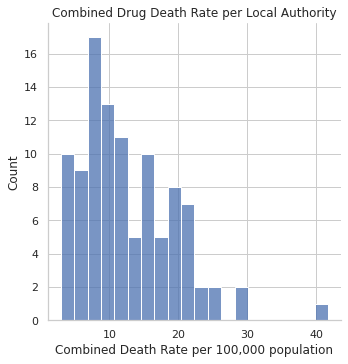

In [46]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["DeathRate"], bins=20)
plt.title('Combined Drug Death Rate per Local Authority')
plt.xlabel('Combined Death Rate per 100,000 population')
plt.savefig('drugs.png', bbox_inches='tight')

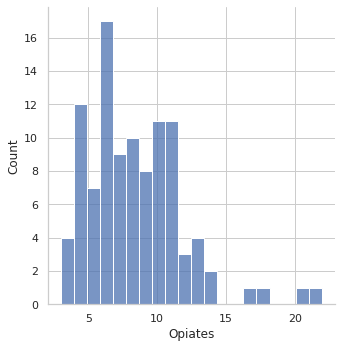

In [47]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["Opiates"], bins=20)

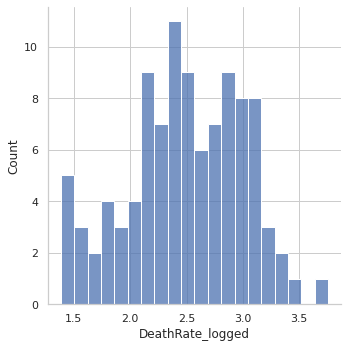

In [48]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["DeathRate_logged"], bins=20)

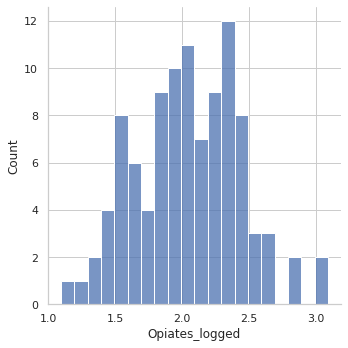

In [49]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["Opiates_logged"], bins=20)

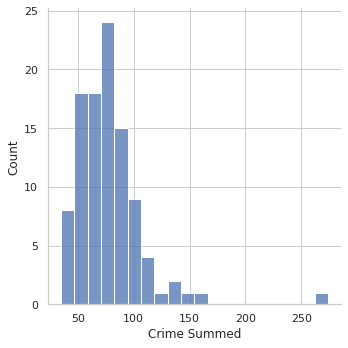

In [50]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["Crime Summed"], bins=20)

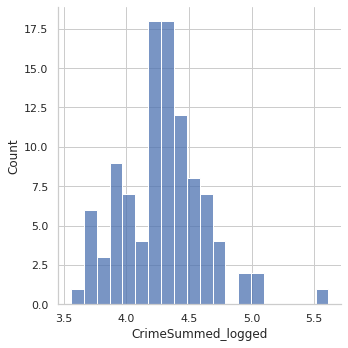

In [51]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["CrimeSummed_logged"], bins=20)

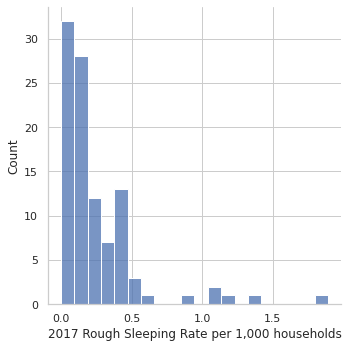

In [52]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["2017 Rough Sleeping Rate per 1,000 households"], bins=20)

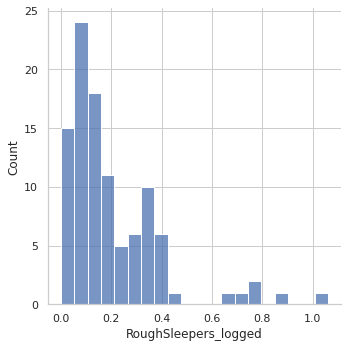

In [53]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["RoughSleepers_logged"], bins=20)

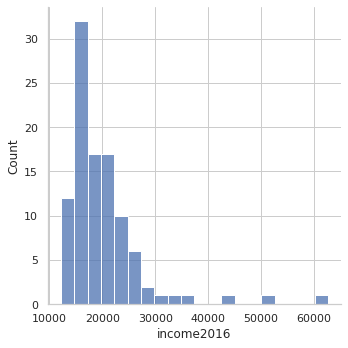

In [54]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["income2016"], bins=20)

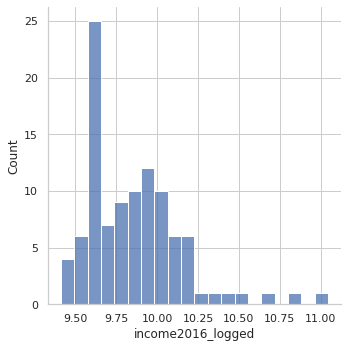

In [55]:
sns.set_theme(style="whitegrid")
ax = sns.displot(x=dfmergedfinal["income2016_logged"], bins=20)

In [56]:
dfmergedlogged = dfmergedfinal[['Local authority', 'Opiates_logged', 'CrimeSummed_logged', 'RoughSleepers_logged', 'income2016_logged', 'DeathRate_logged']]

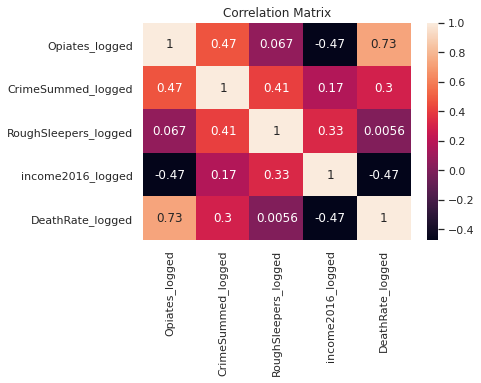

In [57]:
corrMatrix = dfmergedlogged.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix')
plt.savefig('correlation.png', bbox_inches='tight')

In [58]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('DeathRate_logged ~ Opiates_logged+CrimeSummed_logged+RoughSleepers_logged+income2016_logged', data=dfmergedlogged, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,"2,049.5227",Intercept
1,2.1439,Opiates_logged
2,1.8799,CrimeSummed_logged
3,1.3078,RoughSleepers_logged
4,1.8194,income2016_logged


In [59]:
# It turns out it's easier to work with columns with single word names, so...
dfmergedlogged1 = dfmergedlogged.rename(columns = {'Opiates_logged':'Opiates',
                          'CrimeSummed_logged':'Crime',
                          'RoughSleepers_logged':'Rough',
                         'income2016_logged' : 'Income',
                                                  'DeathRate_logged' : 'Death'})

# This performs a multiple regression of wellbeing against greenery and natural light:
multi_regression_model_1 = smf.ols(formula='Death ~ Crime + Rough + Income + Opiates',data=dfmergedlogged1).fit()

# And this gives a big summary of the results:
print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Death   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     30.97
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.31e-16
Time:                        11:57:34   Log-Likelihood:                -34.595
No. Observations:                 102   AIC:                             79.19
Df Residuals:                      97   BIC:                             92.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8934      1.561      2.494      0.0

In [60]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2, beta_3, beta_4 = multi_regression_model_1.params
rsq                    = multi_regression_model_1.rsquared
pval_0, pval_1, pval_2, pval_3, pval_4 = multi_regression_model_1.pvalues

print("y =", round(beta_1,4), "x1 +", round(beta_2,4), "x2 +", round(beta_3,4), "x3+", round(beta_4,4), "x4", round(beta_0,4))
print("R^2     = ", rsq)
print("The Crime P-Value is = ", round(pval_1,100))
print("The Rough Sleepers P-Value is = ", round(pval_2,100))
print("The Income P-Value is =", round(pval_3,100))
print("The opiate user P-value is =", round(pval_4, 100))

y = 0.0313 x1 + 0.0418 x2 + -0.3288 x3+ 0.8281 x4 3.8934
R^2     =  0.5608599271936853
The Crime P-Value is =  0.8271358231256326
The Rough Sleepers P-Value is =  0.8373411271799807
The Income P-Value is = 0.042783843795880176
The opiate user P-value is = 4.2467579598109375e-09


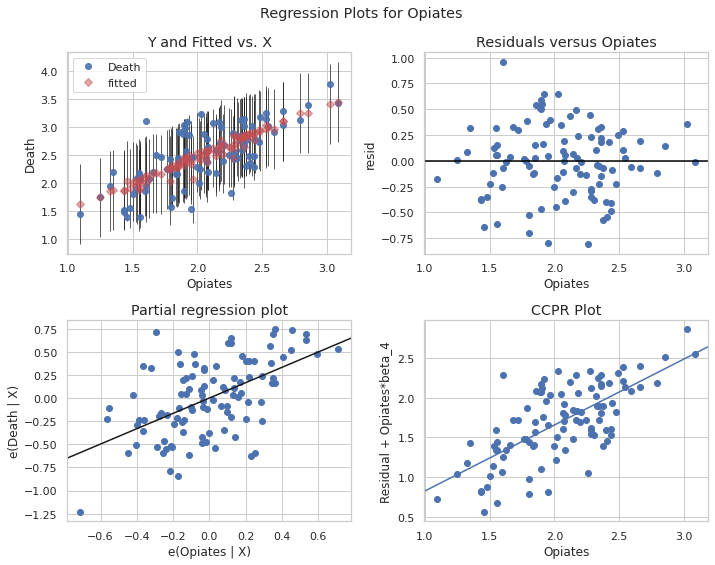

In [61]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'Opiates', fig=fig)

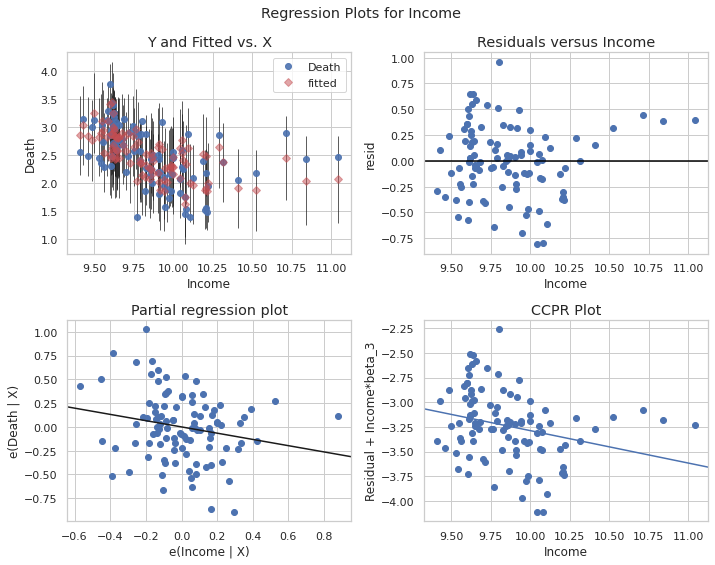

In [62]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'Income', fig=fig)

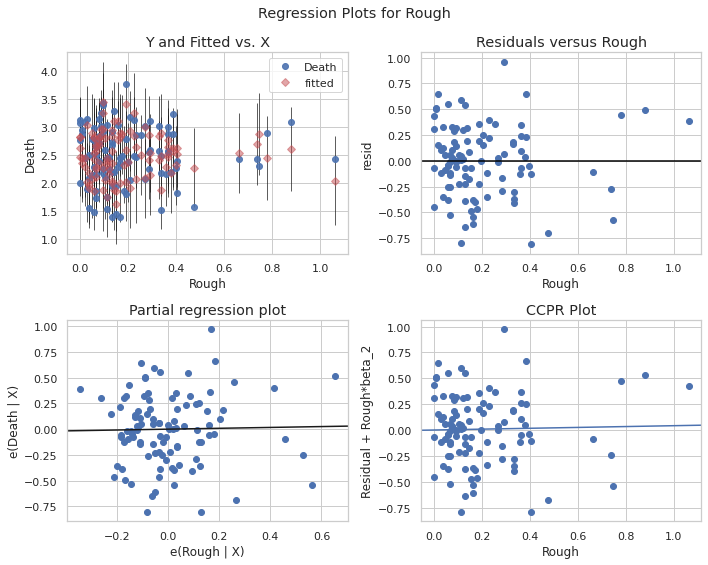

In [63]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'Rough', fig=fig)

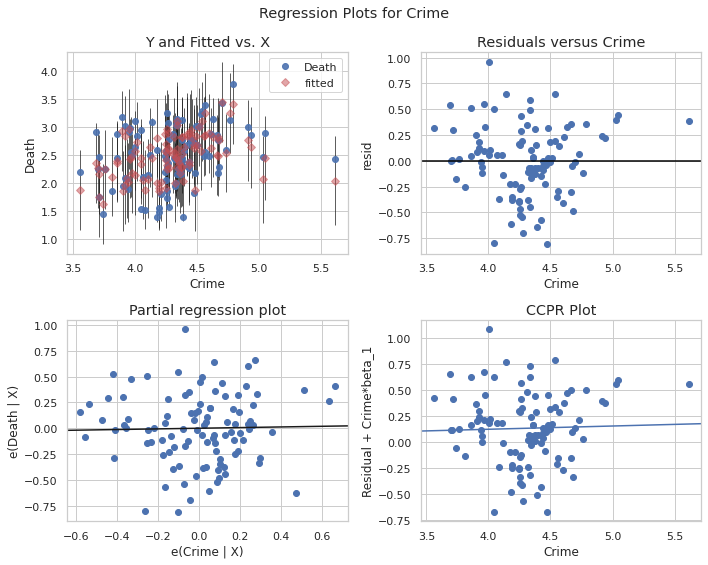

In [64]:
# produce regression plots
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'Crime', fig=fig)